In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
from keras.datasets import mnist

In [3]:
# Conv2d is using in Images
# Conv1d is using in Timeseries
from keras.layers import Conv2D,AveragePooling2D,Dense,Flatten
from keras.utils import np_utils # to convert into one hot encoding like these

In [4]:
(X_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
print(X_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


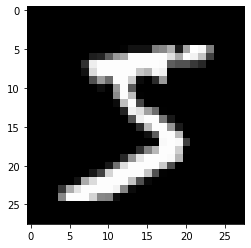

In [6]:
plt.imshow(X_train[0],cmap="gray")

In [7]:
import cv2

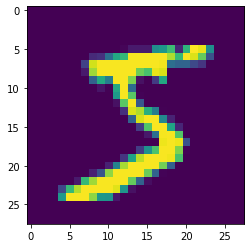

In [8]:
plt.imshow(X_train[0])

In [9]:
X_train.shape[0]

60000

In [10]:
x_train=X_train.reshape(X_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [11]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


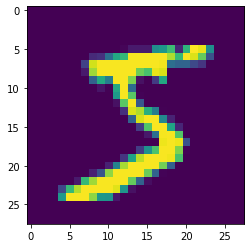

In [12]:
plt.imshow(x_train[0])

In [13]:
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [14]:
x_train=x_train/255  # normalize the data
x_test=x_test/255

In [15]:
x_train[0].shape

(28, 28, 1)

In [16]:
np_utils.to_categorical(y_train,10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
np_utils.to_categorical(y_train,10).shape

(60000, 10)

In [18]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [19]:
y_test.shape

(10000, 10)

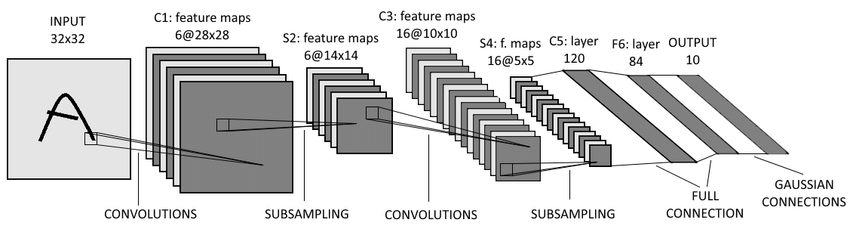

In [20]:
model=Sequential()

In [21]:
model=Sequential()
model.add(Conv2D(6,(4,4),padding="valid",activation="relu",kernel_initializer="he_uniform",input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=None,padding='valid'))

model.add(Conv2D(16,(4,4),padding="valid",activation="relu",kernel_initializer="he_uniform"))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(120,(4,4),padding="valid",activation="relu",kernel_initializer="he_uniform"))

In [22]:
model.summary()  # params =no ofkernels*(size)+no of kernels

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 6)         102       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          1552      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         30840     
                                                                 
Total params: 32,494
Trainable params: 32,494
Non-trai

In [46]:
model=Sequential()
model.add(Conv2D(6,(4,4),padding="valid",activation="tanh",kernel_initializer="glorot_normal",input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(16,(4,4),padding="valid",activation="tanh",kernel_initializer="glorot_uniform"))
model.add(AveragePooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(120,(4,4),padding="valid",activation="tanh",kernel_initializer="glorot_normal"))

model.add(Flatten())
model.add(Dense(84,activation="tanh"))
model.add(Dense(10,activation="softmax"))

In [47]:
model.summary() 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 25, 25, 6)         102       
                                                                 
 average_pooling2d_10 (Avera  (None, 12, 12, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_16 (Conv2D)          (None, 9, 9, 16)          1552      
                                                                 
 average_pooling2d_11 (Avera  (None, 4, 4, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 120)         30840     
                                                                 
 flatten_4 (Flatten)         (None, 120)              

In [48]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=['accuracy'])

In [49]:
model.fit(x_train,y_train,batch_size=10,epochs=5,validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 11s 2ms/step - loss: 0.4717 - accuracy: 0.8661 - val_loss: 0.2313 - val_accuracy: 0.9317
Epoch 2/5
4800/4800 [==============================] - 11s 2ms/step - loss: 0.1912 - accuracy: 0.9439 - val_loss: 0.1396 - val_accuracy: 0.9599
Epoch 3/5
4800/4800 [==============================] - 11s 2ms/step - loss: 0.1240 - accuracy: 0.9636 - val_loss: 0.1036 - val_accuracy: 0.9697
Epoch 4/5
4800/4800 [==============================] - 11s 2ms/step - loss: 0.0922 - accuracy: 0.9732 - val_loss: 0.0834 - val_accuracy: 0.9758
Epoch 5/5
4800/4800 [==============================] - 12s 2ms/step - loss: 0.0756 - accuracy: 0.9773 - val_loss: 0.0744 - val_accuracy: 0.9778


In [50]:
model.predict(x_train)[0]

1875/1875 [==============================] - 3s 2ms/step


array([1.35432801e-05, 5.70577185e-06, 4.03162157e-05, 2.02133581e-01,
       3.61336362e-07, 7.97378600e-01, 1.94509380e-06, 2.94394613e-05,
       1.18854725e-04, 2.77633691e-04], dtype=float32)

In [51]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9804


[0.06492972373962402, 0.980400025844574]

In [52]:
max(model.predict(x_train)[0])

1875/1875 [==============================] - 4s 2ms/step


0.7973786

In [53]:
max(model.predict(x_train)[1])

1875/1875 [==============================] - 3s 2ms/step


0.99956375